In [47]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [49]:
# checando se há GPU ativa no ambiente do Google Colab
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


In [55]:
# plot imagem with bounding_boxes
def plot_image():
  plt.figure(figsize=(10, 6))
  image_with_bounding_boxes = cv2.imread("predictions.jpg", cv2.COLOR_BGR2RGB)
  plt.imshow(cv2.cvtColor(image_with_bounding_boxes, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.show()

# count objects on output.text
def count_objects():
  with open("output.txt", "r") as file:
      content = file.read()
      number_of_objects = content.count("person:")
      print("Quantidade de pessoas na imagem:", number_of_objects)

In [50]:
ls

backup/    include/        LICENSE.gen   Makefile         README.md
cfg/       libdarknet.a    LICENSE.gpl   obj/             results/
darknet*   libdarknet.so*  LICENSE.meta  output.txt       scripts/
data/      LICENSE         LICENSE.mit   predictions.jpg  src/
examples/  LICENSE.fuck    LICENSE.v1    python/          yolov3-tiny.weights


* Como primeira etapa, realizou-se o clone da Darknet do  [repositório](https://github.com/pjreddie/darknet).

In [ ]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955 (from 1)
Receiving objects: 100% (5955/5955), 6.37 MiB | 20.08 MiB/s, done.
Resolving deltas: 100% (3931/3931), done.
/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolution

In [ ]:
%cd darknet # acessando pasta da DarkNet
!make

* Posteriormente, compilou-se a biblioteca com base na pasta que está sendo acessada, para construir o framework para utilização.


* No arquivo **Makefile** foi configurado o usado OpenCv, da GPU e do CUDA.

In [51]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

!make

gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -DCUDNN  -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -c ./src/gemm.c -o obj/gemm.o
Package opencv was not found in the pkg-config search path.
Perhaps you should add the directory containing `opencv.pc'
to the PKG_CONFIG_PATH environment variable
Package 'opencv', required by 'virtual:world', not found
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wdeprecated-declarations-Wdeprecated-declarations]8;;]
  232 |         cudaThreadSynchronize();
      |         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:95,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:1069:57: n

* Em seguida, os pesos da YOLOv3-tiny foram baixados.

In [ ]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2025-01-02 10:43:15--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  9.70MB/s    in 3.5s    

2025-01-02 10:43:20 (9.70 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



* Finalmente, a YOLOv3-tiny foi aplicada para detectar a quantidade de pessoas na imagem fornecida.

* Os resultados da dectecão são salvos no arquivo **output.txt**, e a imagem com seus respectivos *bounding boxes* é salva no arquivo **prediction.jpg**.

In [57]:
! ./darknet detect cfg/yolov3-tiny.cfg yolov3-tiny.weights ../persons.png -dont_show -ext_output -save_labels > output.txt

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

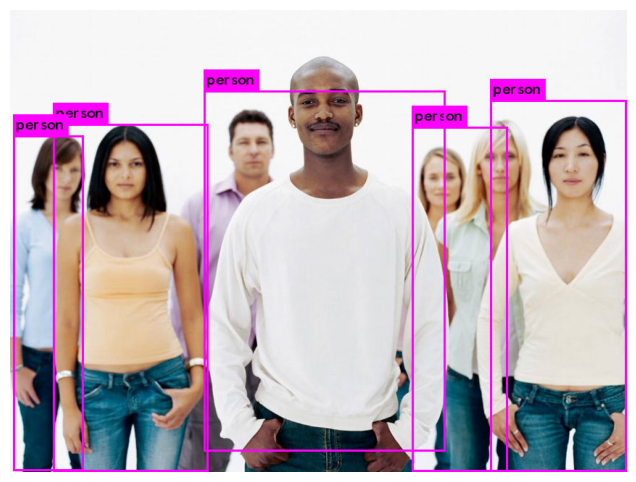

In [58]:
plot_image()

* Observando o resultado, a detecção das pessoas na imagem não ocorreu de forma satisfatória. Tal fato pode ser atribuído à sobreposição das pessoas na imagem.

* Uma possibilidade seria reduzir o threshold da  YOLOv3-tiny.

* Ao realizar alguns testes, o valor de 0,28 forneceu a contagem de pessoas de forma correta.

In [59]:
! ./darknet detect cfg/yolov3-tiny.cfg yolov3-tiny.weights ../persons.png -dont_show -ext_output -save_labels -thresh 0.28 > output.txt

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

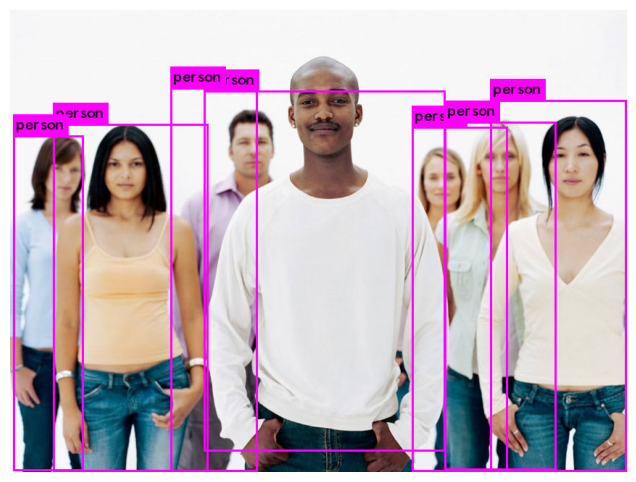

In [60]:
plot_image()

In [65]:
count_objects()

Quantidade de pessoas na imagem: 7


* Embora a quantidade de pessoas tenha sido encontrada com sucesso, o valor de threshold utilizado é muito baixo, desse modo, o modelo estaria trabalhando com resultados de baixa confiabilidade.

* Nesse contexto, uma alternativa para a detecção das pessoas na imagem seria, em vez de buscar por pessoas em si, buscar por faces, uma vez que elas estão totalmente visíveis na imagem.

* A tarefa de detecção de faces é comumente realizada utilizando uma YOLO pré-treinada com o conjunto de dados [WIDER FACE](http://shuoyang1213.me/WIDERFACE/).

* Nesse [repositório](https://github.com/sthanhng/yoloface), são disponibilizados os pesos da rede pré-treinada com o conjunto de dados WIDER FACE e o seu respectivo arquivo .cfg.

* O arquivo .cfg fornecido não foi alterado, visto que suas configurações iniciais já resolveram o problema de forma imediata.

* Sobre o .cfg tem-se as seguintes observações:



```
learning_rate=0.001
  * Indica a taxa de aprendizagem, "velocidade" com que os pesos são atualizados durante o treinamento da rede.
batch=1
  * Indica que uma imagem por vez foi processada durante o treinamento
subdivisions=1
  * Indica que lote de treinamento foi dividido em apenas uma subdivisão.
classes=1
  * Esse parâmetro indica que a rede tem como objetivo detectar apenas uma classe, que é a do tipo 'face'.
num=9:
  * O número de ancoragens usada foi de 9, onde a rede ajustará as 9 ancoragens para prever melhor as caixas delimitadoras dos objetos.
```




In [67]:
! ./darknet detect cfg/yolov3-face.cfg.txt cfg/yolov3-wider_16000.weights ../persons.png -dont_show -ext_output -save_labels > output.txt

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8                 104 x 

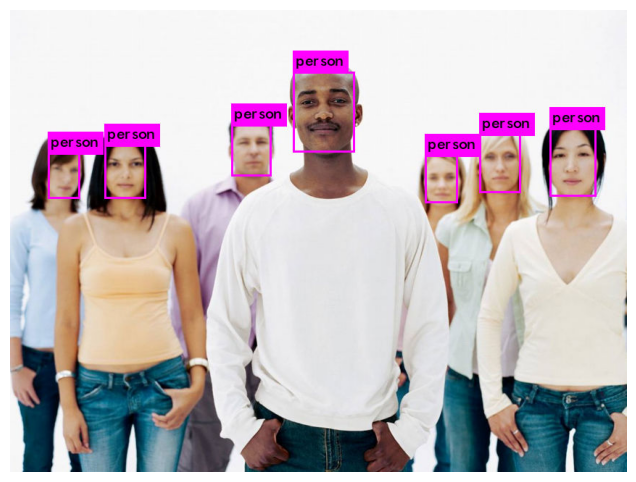

In [69]:
plot_image()

In [70]:
count_objects()

Quantidade de pessoas na imagem: 7


* Conforme verificado, a estratégia de utilizar as faces das pessoas para realizar a contagem mostrou-se mais eficaz do que realizar a detecção do corpo inteiro da pessoa.

* Além disso, observando o nível de confibilidade de cada predição no arquivo **output.txt**, nota-se que o valores obtidos são extremamente altos, diferente dos obtidos com a abordagem anterior.



```
person: 100%
person: 100%
person: 100%
person: 100%
person: 100%
person: 100%
person: 98%
```

